In [3]:
import pandas as pdY

PosixPath('/Users/Harry/Oxford/DPhil/Projects/owain_evans/figs/learnability_vs_articulation_mcq_gpt4_1.png')

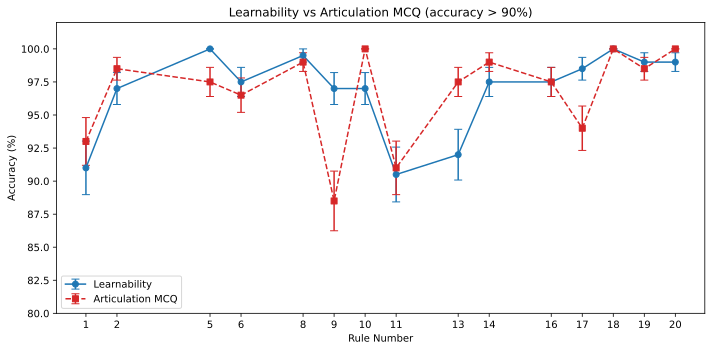

In [7]:
# Learnability vs Articulation MCQ (GPT-4.1)
from pathlib import Path
import json
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

cwd = Path.cwd()
project_root = cwd if (cwd / 'results').exists() else cwd.parent

learn_dir = project_root / 'results' / 'learnability' / 'gpt_4_1'
art_dir = project_root / 'results' / 'articulation_mcq' / 'gpt_4_1'
rows = []
for lp in sorted(learn_dir.glob('rule_*.json'), key=lambda p: int(p.stem.split('_')[1])):
    rule = int(lp.stem.split('_')[1])
    learn_data = json.loads(lp.read_text())
    learn_acc = learn_data.get('accuracy')
    learn_se = learn_data.get('standard_error')
    art_path = art_dir / f'rule_{rule}.json'
    if not art_path.exists():
        continue
    art_data = json.loads(art_path.read_text())
    art_acc = art_data.get('accuracy')
    art_se = art_data.get('standard_error')
    if (learn_acc is None or learn_acc <= 0.9 or
            art_acc is None or art_se is None or learn_se is None):
        continue
    rows.append((rule, learn_acc, learn_se, art_acc, art_se))

if not rows:
    raise ValueError('No rules met the accuracy > 90% criterion for learnability.')

rules = [r[0] for r in rows]
learn_acc = [r[1] * 100 for r in rows]
learn_se = [r[2] * 100 for r in rows]
art_acc = [r[3] * 100 for r in rows]
art_se = [r[4] * 100 for r in rows]

fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(rules, learn_acc, yerr=learn_se, fmt='o-', color='#1f77b4', capsize=4, label='Learnability')
ax.errorbar(rules, art_acc, yerr=art_se, fmt='s--', color='#d62728', capsize=4, label='Articulation MCQ')
ax.set_xlabel('Rule Number')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Learnability vs Articulation MCQ (accuracy > 90%)')
ax.set_xticks(rules)
ax.set_xticklabels([str(r) for r in rules])
ax.set_ylim(80, 102)
ax.legend()
ax.grid(False)
fig.tight_layout()

figs_dir = project_root / 'figs'
figs_dir.mkdir(exist_ok=True)
fig_path = figs_dir / 'learnability_vs_articulation_mcq_gpt4_1.png'
fig.savefig(fig_path, dpi=300)
fig_path

PosixPath('/Users/Harry/Oxford/DPhil/Projects/owain_evans/figs/learnability_vs_articulation_mcq_gpt4_1.png')

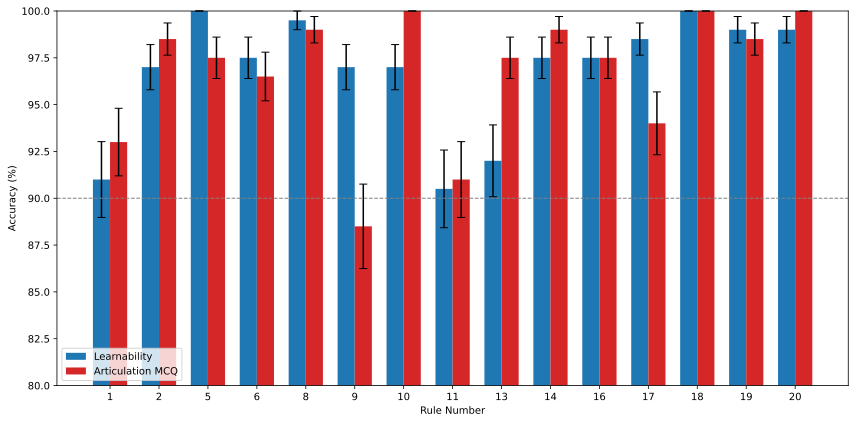

In [8]:
# Learnability vs Articulation MCQ (GPT-4.1)
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np

cwd = Path.cwd()
project_root = cwd if (cwd / 'results').exists() else cwd.parent

learn_dir = project_root / 'results' / 'learnability' / 'gpt_4_1'
art_dir = project_root / 'results' / 'articulation_mcq' / 'gpt_4_1'
rows = []
for lp in sorted(learn_dir.glob('rule_*.json'), key=lambda p: int(p.stem.split('_')[1])):
    rule = int(lp.stem.split('_')[1])
    learn_data = json.loads(lp.read_text())
    learn_acc = learn_data.get('accuracy')
    learn_se = learn_data.get('standard_error')
    art_path = art_dir / f'rule_{rule}.json'
    if not art_path.exists():
        continue
    art_data = json.loads(art_path.read_text())
    art_acc = art_data.get('accuracy')
    art_se = art_data.get('standard_error')
    if (learn_acc is None or learn_acc <= 0.9 or
            art_acc is None or art_se is None or learn_se is None):
        continue
    rows.append((rule, learn_acc, learn_se, art_acc, art_se))

if not rows:
    raise ValueError('No rules met the accuracy > 90% criterion for learnability.')

rules = [r[0] for r in rows]
indices = np.arange(len(rules))
bar_width = 0.35

learn_acc = np.array([r[1] * 100 for r in rows])
learn_se = np.array([r[2] * 100 for r in rows])
art_acc = np.array([r[3] * 100 for r in rows])
art_se = np.array([r[4] * 100 for r in rows])

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(indices - bar_width / 2, learn_acc, bar_width, yerr=learn_se, capsize=4,
       color='#1f77b4', label='Learnability')
ax.bar(indices + bar_width / 2, art_acc, bar_width, yerr=art_se, capsize=4,
       color='#d62728', label='Articulation MCQ')

ax.axhline(90, color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Rule Number')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(indices)
ax.set_xticklabels([str(r) for r in rules])
ax.set_ylim(80, 100)
ax.legend()
ax.grid(False)
fig.tight_layout()

figs_dir = project_root / 'figs'
figs_dir.mkdir(exist_ok=True)
fig_path = figs_dir / 'learnability_vs_articulation_mcq_gpt4_1.png'
fig.savefig(fig_path, dpi=300)
fig_path

PosixPath('/Users/Harry/Oxford/DPhil/Projects/owain_evans/figs/learnability_vs_articulation_mcq_free_gpt4_1.png')

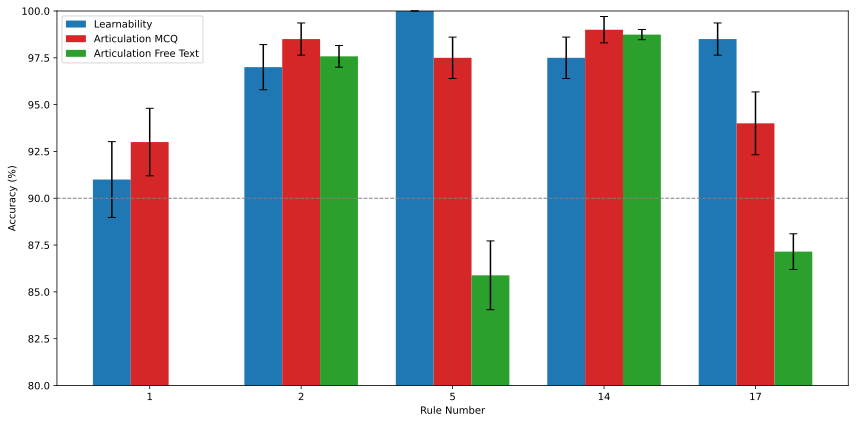

In [9]:
# Learnability vs Articulation (MCQ & Free Text) for selected rules (GPT-4.1)
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

selected_rules = [1, 2, 5, 14, 17]

cwd = Path.cwd()
project_root = cwd if (cwd / 'results').exists() else cwd.parent

learn_dir = project_root / 'results' / 'learnability' / 'gpt_4_1'
art_dir = project_root / 'results' / 'articulation_mcq' / 'gpt_4_1'
free_dir = project_root / 'results' / 'articulation_free' / 'gpt_4_1'

rows = []
for rule in selected_rules:
    learn_path = learn_dir / f'rule_{rule}.json'
    art_path = art_dir / f'rule_{rule}.json'
    free_path = free_dir / f'rule_{rule}_articulation_free.json'
    if not (learn_path.exists() and art_path.exists() and free_path.exists()):
        continue

    learn_data = json.loads(learn_path.read_text())
    art_data = json.loads(art_path.read_text())
    free_data = json.loads(free_path.read_text())

    learn_acc = learn_data.get('accuracy')
    learn_se = learn_data.get('standard_error')
    art_acc = art_data.get('accuracy')
    art_se = art_data.get('standard_error')

    free_scores = [entry.get('full_data_accuracy') for entry in free_data.get('results', [])
                   if entry.get('full_data_accuracy') is not None]
    if not free_scores:
        continue
    free_acc = float(np.mean(free_scores))
    free_se = float(np.std(free_scores, ddof=1) / np.sqrt(len(free_scores))) if len(free_scores) > 1 else 0.0

    if None in (learn_acc, learn_se, art_acc, art_se):
        continue

    rows.append((rule, learn_acc, learn_se, art_acc, art_se, free_acc, free_se))

if not rows:
    raise ValueError('No complete data found for the selected rules.')

rules = [r[0] for r in rows]
indices = np.arange(len(rules))
bar_width = 0.25

learn_acc = np.array([r[1] * 100 for r in rows])
learn_se = np.array([r[2] * 100 for r in rows])
art_acc = np.array([r[3] * 100 for r in rows])
art_se = np.array([r[4] * 100 for r in rows])
free_acc = np.array([r[5] * 100 for r in rows])
free_se = np.array([r[6] * 100 for r in rows])

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(indices - bar_width, learn_acc, bar_width, yerr=learn_se, capsize=4,
       color='#1f77b4', label='Learnability')
ax.bar(indices, art_acc, bar_width, yerr=art_se, capsize=4,
       color='#d62728', label='Articulation MCQ')
ax.bar(indices + bar_width, free_acc, bar_width, yerr=free_se, capsize=4,
       color='#2ca02c', label='Articulation Free Text')

ax.axhline(90, color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Rule Number')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(indices)
ax.set_xticklabels([str(r) for r in rules])
ax.set_ylim(80, 100)
ax.legend()
ax.grid(False)
fig.tight_layout()

figs_dir = project_root / 'figs'
figs_dir.mkdir(exist_ok=True)
fig_path = figs_dir / 'learnability_vs_articulation_mcq_free_gpt4_1.png'
fig.savefig(fig_path, dpi=300)
fig_path

PosixPath('/Users/Harry/Oxford/DPhil/Projects/owain_evans/figs/learnability_vs_articulation_mcq_free_gpt4_1.png')

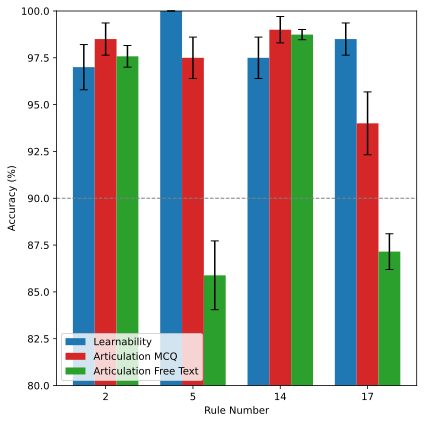

In [10]:
# Learnability vs Articulation (MCQ & Free Text) for selected rules (GPT-4.1)
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

selected_rules = [2, 5, 14, 17]

cwd = Path.cwd()
project_root = cwd if (cwd / 'results').exists() else cwd.parent

learn_dir = project_root / 'results' / 'learnability' / 'gpt_4_1'
art_dir = project_root / 'results' / 'articulation_mcq' / 'gpt_4_1'
free_dir = project_root / 'results' / 'articulation_free' / 'gpt_4_1'

rows = []
for rule in selected_rules:
    learn_path = learn_dir / f'rule_{rule}.json'
    art_path = art_dir / f'rule_{rule}.json'
    free_path = free_dir / f'rule_{rule}_articulation_free.json'
    if not (learn_path.exists() and art_path.exists() and free_path.exists()):
        continue

    learn_data = json.loads(learn_path.read_text())
    art_data = json.loads(art_path.read_text())
    free_data = json.loads(free_path.read_text())

    learn_acc = learn_data.get('accuracy')
    learn_se = learn_data.get('standard_error')
    art_acc = art_data.get('accuracy')
    art_se = art_data.get('standard_error')

    free_scores = [entry.get('full_data_accuracy') for entry in free_data.get('results', [])
                   if entry.get('full_data_accuracy') is not None]
    if not free_scores:
        continue
    free_acc = float(np.mean(free_scores))
    free_se = float(np.std(free_scores, ddof=1) / np.sqrt(len(free_scores))) if len(free_scores) > 1 else 0.0

    if None in (learn_acc, learn_se, art_acc, art_se):
        continue

    rows.append((rule, learn_acc, learn_se, art_acc, art_se, free_acc, free_se))

if not rows:
    raise ValueError('No complete data found for the selected rules.')

rules = [r[0] for r in rows]
indices = np.arange(len(rules))
bar_width = 0.25

learn_acc = np.array([r[1] * 100 for r in rows])
learn_se = np.array([r[2] * 100 for r in rows])
art_acc = np.array([r[3] * 100 for r in rows])
art_se = np.array([r[4] * 100 for r in rows])
free_acc = np.array([r[5] * 100 for r in rows])
free_se = np.array([r[6] * 100 for r in rows])

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(indices - bar_width, learn_acc, bar_width, yerr=learn_se, capsize=4,
       color='#1f77b4', label='Learnability')
ax.bar(indices, art_acc, bar_width, yerr=art_se, capsize=4,
       color='#d62728', label='Articulation MCQ')
ax.bar(indices + bar_width, free_acc, bar_width, yerr=free_se, capsize=4,
       color='#2ca02c', label='Articulation Free Text')

ax.axhline(90, color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Rule Number')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(indices)
ax.set_xticklabels([str(r) for r in rules])
ax.set_ylim(80, 100)
ax.legend()
ax.grid(False)
fig.tight_layout()

figs_dir = project_root / 'figs'
figs_dir.mkdir(exist_ok=True)
fig_path = figs_dir / 'learnability_vs_articulation_mcq_free_gpt4_1.png'
fig.savefig(fig_path, dpi=300)
fig_path

PosixPath('/Users/Harry/Oxford/DPhil/Projects/owain_evans/figs/articulation_mcq_vs_single_gpt4_1.png')

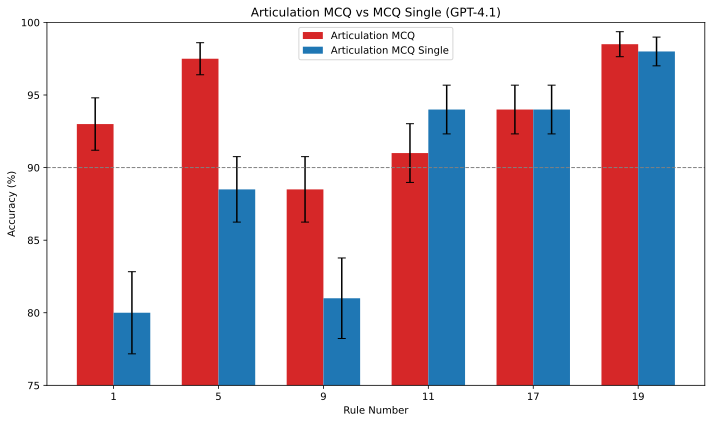

In [11]:
# Articulation MCQ vs Articulation MCQ Single (GPT-4.1)
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

selected_rules = [1, 5, 9, 11, 17, 19]

cwd = Path.cwd()
project_root = cwd if (cwd / 'results').exists() else cwd.parent

mcq_dir = project_root / 'results' / 'articulation_mcq' / 'gpt_4_1'
single_dir = project_root / 'results' / 'articulation_mcq_single' / 'gpt_4_1'

rows = []
for rule in selected_rules:
    mcq_path = mcq_dir / f'rule_{rule}.json'
    single_path = single_dir / f'rule_{rule}.json'
    if not (mcq_path.exists() and single_path.exists()):
        continue

    mcq_data = json.loads(mcq_path.read_text())
    single_data = json.loads(single_path.read_text())

    mcq_acc = mcq_data.get('accuracy')
    mcq_se = mcq_data.get('standard_error')
    single_acc = single_data.get('accuracy')
    single_se = single_data.get('standard_error')

    if None in (mcq_acc, mcq_se, single_acc, single_se):
        continue

    rows.append((rule, mcq_acc, mcq_se, single_acc, single_se))

if not rows:
    raise ValueError('No complete data found for the selected rules.')

rules = [r[0] for r in rows]
indices = np.arange(len(rules))
bar_width = 0.35

mcq_acc = np.array([r[1] * 100 for r in rows])
mcq_se = np.array([r[2] * 100 for r in rows])
single_acc = np.array([r[3] * 100 for r in rows])
single_se = np.array([r[4] * 100 for r in rows])

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(indices - bar_width / 2, mcq_acc, bar_width, yerr=mcq_se, capsize=4,
       color='#d62728', label='Articulation MCQ')
ax.bar(indices + bar_width / 2, single_acc, bar_width, yerr=single_se, capsize=4,
       color='#1f77b4', label='Articulation MCQ Single')

ax.axhline(90, color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Rule Number')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(indices)
ax.set_xticklabels([str(r) for r in rules])
ax.set_ylim(75, 100)
ax.set_title('Articulation MCQ vs MCQ Single (GPT-4.1)')
ax.legend()
ax.grid(False)
fig.tight_layout()

figs_dir = project_root / 'figs'
figs_dir.mkdir(exist_ok=True)
fig_path = figs_dir / 'articulation_mcq_vs_single_gpt4_1.png'
fig.savefig(fig_path, dpi=300)
fig_path
